In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()


Saving moviereviews.csv to moviereviews.csv


In [126]:
df = pd.read_csv("moviereviews.csv")

In [127]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [128]:
df.isnull().sum()

,0
label,0
review,35


In [129]:
# getting rid of Null reviews
df = df.dropna()

In [130]:
df.isnull().sum()

,0
label,0
review,0


In [131]:
s = ""

In [132]:
df = df[~df['review'].str.isspace()]

In [133]:
#verifying that there is no empty review in our dataset
df[df['review'].apply(lambda review: review =='')]

,label,review


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [135]:
df['label'].value_counts()
# it shows our data is balanced

,count
label,
neg,969
pos,969


Text Visualization

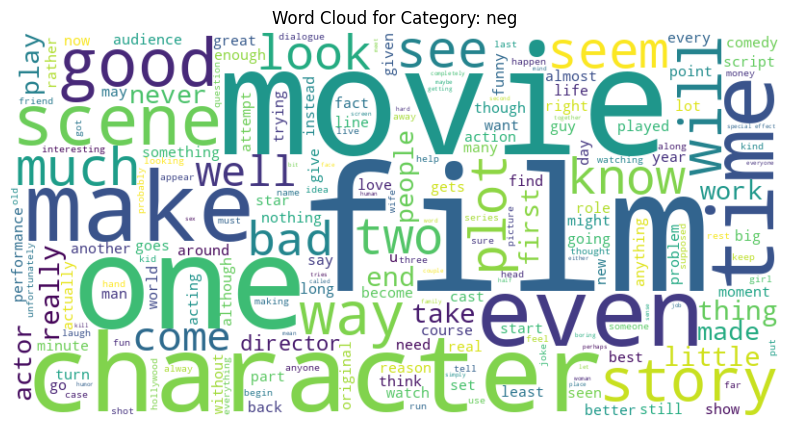

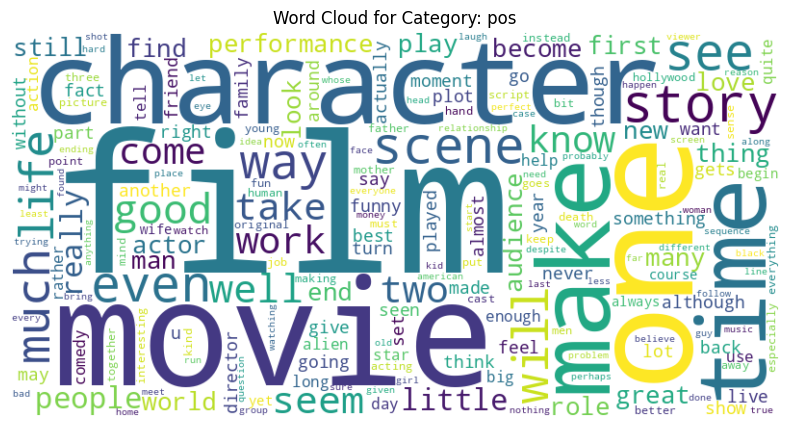

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for category in df['label'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['label'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['review'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

DATA PREPROCESSING

In [137]:
# Encode Category column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['label']=le.fit_transform(df['label'])
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


Lowercasing Text

In [138]:
# Convert 'Text' column to lowercase
df['review'] = df['review'].str.lower()
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


Removing Extra White Spaces

In [139]:
#removing Extra white spaces
df['review'] = df['review'].str.strip()
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


Removing Special Characters

In [140]:
import re

def remove_special_characters(text):
    # Matches any character that is not a-z, A-Z, 0-9, or whitespace
    pattern = r'[^a-zA-Z0-9\s]'
    clean_text = re.sub(pattern, '', text)
    return clean_text

# Apply to the review column
df['review'] = df['review'].apply(remove_special_characters)

In [141]:
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of 1998 and already i...


removing Numerical Values

In [142]:
#remove numerical Values
import re

def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply to the 'review' column
df['review'] = df['review'].apply(remove_numeric)

In [143]:
df.head()

,label,review
0,0,how do films like mouse hunt get into theatres...
1,0,some talented actresses are blessed with a dem...
2,1,this has been an extraordinary year for austra...
3,1,according to hollywood movies made in last few...
4,0,my first press screening of and already ive g...


Removing non alpha numeric

In [144]:
#Removing non alpha numeric

def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df['review'] = df['review'].apply(remove_non_alphanumeric)

Handling Stop Words

In [145]:
#Handling Stop words


import nltk
from nltk.corpus import stopwords

# Download stopwords corpus
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply to the 'review' column
df['review'] = df['review'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Handling Emojis

In [146]:
# Handling Emojis
#!pip install emoji
import emoji

def remove_emojis(text):
    return emoji.demojize(text)

df['review'] = df['review'].apply(remove_emojis)

STEMMING

In [147]:
#Stemming
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['review_stemmed'] = df['review'].apply(
    lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()])
)

TEXT Vectorization

In [148]:
# Text Vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
cv = CountVectorizer()

# Fit and transform the review_stemmed
X = cv.fit_transform(df['review_stemmed']).toarray()

# Target variable
y = df['label']

Training And Data

In [149]:
x = df['review']
y = df['label']

In [150]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=102)

Machine Learning Algorithim

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC())])

text_clf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

Perfomance Matrix

In [69]:

y_pred = text_clf.predict(x_test)

Confusion Matrix:
 [[157  39]
 [ 28 164]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       196
           1       0.81      0.85      0.83       192

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388

Accuracy Score: 0.8273195876288659


Text(0.5, 1.0, 'Confusion Matrix')

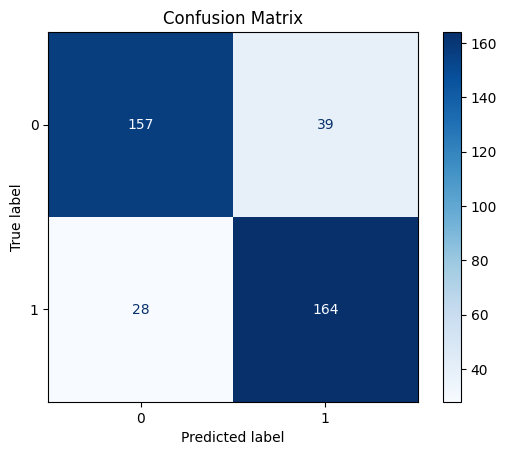

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(text_clf, x_test, y_test, cmap='Blues')
disp.ax_.set_title("Confusion Matrix")


Deep Learning

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

VOCAB_SIZE = 10000
EMBED_DIM = 16
MAXLEN = 100

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=EMBED_DIM, input_length=MAXLEN),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [152]:
model.fit(x_train_pad, y_train, epochs=10, batch_size=32, validation_data=(x_test_pad, y_test))


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5170 - loss: 0.6929 - val_accuracy: 0.6881 - val_loss: 0.6894
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8316 - loss: 0.6803 - val_accuracy: 0.7526 - val_loss: 0.6614
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9233 - loss: 0.6102 - val_accuracy: 0.7964 - val_loss: 0.5841
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9424 - loss: 0.4503 - val_accuracy: 0.8351 - val_loss: 0.4919
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9736 - loss: 0.2731 - val_accuracy: 0.8402 - val_loss: 0.4334
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9886 - loss: 0.1632 - val_accuracy: 0.8402 - val_loss: 0.4035
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9976 - loss: 0.0944 - val_accuracy: 0.8479 - val_loss: 0.3917
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0569 - val_accuracy: 0.8273 - val_loss

In [153]:
# Predict probabilities
y_pred_probs = model.predict(x_test_pad)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


Perfomance Metrics

Accuracy: 0.845360824742268
[[167  29]
 [ 31 161]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       196
           1       0.85      0.84      0.84       192

    accuracy                           0.85       388
   macro avg       0.85      0.85      0.85       388
weighted avg       0.85      0.85      0.85       388



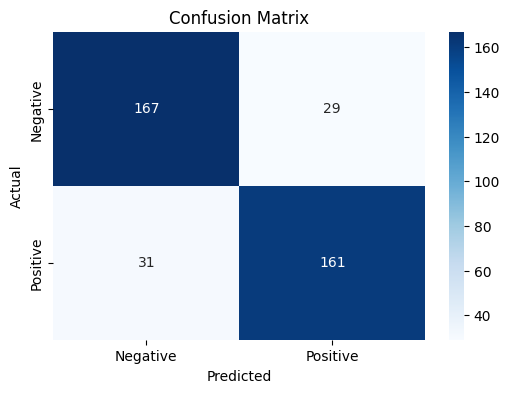

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert probabilities to binary class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype("int").flatten()

# Print accuracy, confusion matrix, and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Saving the model

In [173]:
model.save('movie_review_model.h5')
